In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv("/home/swati/Practice_Research/stock/Stocks/aa.us.txt")
data.head()

print("Data Shape -->", data.shape)


Data Shape --> (12074, 7)


In [2]:

# Describe the dataset
data.describe()

# Check for missing values
data.isna().sum()

# Split the data into training and test sets
training_size = int(len(data) * 0.80)
data_len = len(data)
train, test = data[0:training_size], data[training_size:data_len]

print("Training Size --> ", training_size)
print("Total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

# Prepare the training data
train = train.loc[:, ["Open"]].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("X_train --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)



Training Size -->  9659
Total length of data -->  12074
Train length -->  9659
Test length -->  2415
X_train -->  (9619, 40, 1)
y_train shape -->  (9619,)


In [3]:
# Import LSTM and other necessary layers from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Initialize the LSTM model
regressor = Sequential()

# Add LSTM layers
regressor.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, activation='tanh'))
regressor.add(Dropout(0.2))

# Add the output layer
regressor.add(Dense(units=1))



2024-05-30 12:39:00.041374: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-05-30 12:39:01.511273: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-05-30 12:39:01.512583: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-05-30 12:39:01.558240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-30 12:39:01.560400: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:10.0 name: NVIDIA A40 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 84 deviceMemorySize: 44.34GiB deviceMemoryBandwidth: 648.29GiB/s
2024-05-30 12:39:01.560455: I tensorflow/stream_executor/platform/default/dso_loa

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [4]:
# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs = 100
batch_size = 20
history = regressor.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)


Epoch 1/100
 56/481 [==>...........................] - ETA: 0s - loss: 9.6721e-04 

2024-05-30 12:42:16.445921: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-05-30 12:42:16.446760: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2693670000 Hz


481/481 [==============================] - 1s 893us/step - loss: 0.0011
Epoch 2/100
481/481 [==============================] - 0s 850us/step - loss: 0.0011
Epoch 3/100
481/481 [==============================] - 0s 793us/step - loss: 0.0011
Epoch 4/100
481/481 [==============================] - 0s 826us/step - loss: 0.0010
Epoch 5/100
481/481 [==============================] - 0s 865us/step - loss: 0.0011
Epoch 6/100
481/481 [==============================] - 0s 834us/step - loss: 0.0010
Epoch 7/100
481/481 [==============================] - 0s 815us/step - loss: 0.0010
Epoch 8/100
481/481 [==============================] - 0s 804us/step - loss: 0.0010
Epoch 9/100
481/481 [==============================] - 0s 810us/step - loss: 0.0011
Epoch 10/100
481/481 [==============================] - 0s 814us/step - loss: 0.0010
Epoch 11/100
481/481 [==============================] - 0s 768us/step - loss: 0.0011
Epoch 12/100
481/481 [==============================] - 0s 780us/step - loss: 0.0010
E

481/481 [==============================] - 0s 843us/step - loss: 0.0010
Epoch 98/100
481/481 [==============================] - 0s 831us/step - loss: 0.0010
Epoch 99/100
481/481 [==============================] - 0s 816us/step - loss: 0.0011
Epoch 100/100
481/481 [==============================] - 0s 761us/step - loss: 0.0011


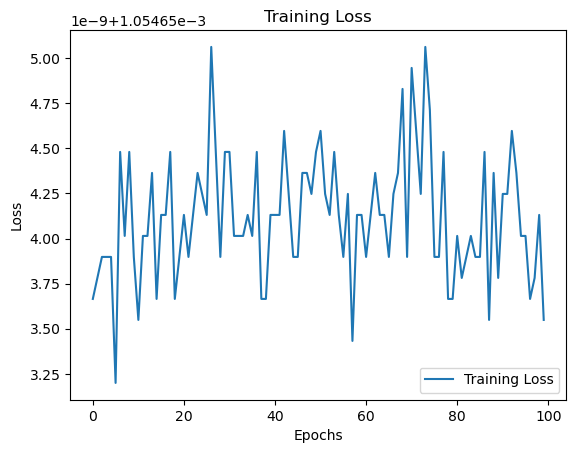

In [6]:

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
